## Causal Mixture Model (CMM) Discovery (Chapter 6)

In [2]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.insert(0, os.path.abspath(".."))

import networkx as nx
import numpy as np
import pandas as pd

from src.exp.exp_change.gen.generate import NoiseType, IvType, FunType, DagType, IvMode, gen_data_type
from src.exp.exp_change.algos import CD
from src.exp.exp_change.gen.generate import GSType

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Example Synthetic Dataset

In [3]:
mixed_X = np.array(pd.read_csv('../demo/datasets/chapter6_mix/example_synthetic.tsv', sep='\t'))
true_g = nx.from_numpy_array(np.array(pd.read_csv('../demo/datasets/chapter6_mix/example_synthetic_g.tsv', sep='\t')), create_using=nx.DiGraph)

In [4]:
print("Available Causal Discovery Methods:", [cd.value for cd in CD])

Available Causal Discovery Methods: ['skip', 'topic', 'topic-contexts-gp', 'topic-contexts-rff', 'causal-mixtures', 'causal-mixtures-ges', 'pc-partial-correl', 'pc-kci-partial-correl', 'fci', 'fci-kci', 'ges', 'cam', 'lingam', 'score', 'das', 'nogam', 'cam-uv', 'r2sort', 'randsort', 'varsort', 'mix-utigsp', 'cdnod-pc', 'cdnod-kci', 'jci-pc-pc', 'jci-pc-kci', 'jci-fci-pc', 'jci-fci-kci', 'utigsp']


####  Causal Mixture Model (TOPIC)

In [5]:
method_name = CD.CausalMixtures
method = method_name.get_method()
method.fit(mixed_X)
print(f"Graph eval ({method_name}): {method.get_graph_metrics(true_g)}")


print(f"Mixed Node sets: Topo {method.e_n_Z}" )
print(f"Graph eval (topo): {method.get_graph_metrics(true_g)}")

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: C:\Program Files\R\R-4.3.3
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save


DataMode.MIXED
Graph eval (causal-mixtures): {'sc': 0.003333333333333333, 'shd': 0.2, 'sd': 0.06666666666666667, 'anc-aid': 0.26666666666666666, 'parent-aid': 0.3333333333333333, 'sym-sd': 0.03333333333333333, 'sym-anc-aid': 0.26666666666666666, 'sym-pa-aid': 0.3, 'shd-nm': 0.0008888888888888889, 'f1': 0.896551724137931, 'tp': 13, 'fp': 1, 'fn': 2, 'tn': 20, 'tpr': 0.8666666666666667, 'fpr': 0.047619047619047616, 'pr': 0.3888888888888889, 'tnr': 0.9523809523809523, 'fnr': 0.1333333333333333, 'mcc': np.float64(0.828302688169126)}
Mixed Node sets: Topo [{0, 4}, {5}]
Graph eval (topo): {'sc': 0.003333333333333333, 'shd': 0.2, 'sd': 0.06666666666666667, 'anc-aid': 0.26666666666666666, 'parent-aid': 0.3333333333333333, 'sym-sd': 0.03333333333333333, 'sym-anc-aid': 0.26666666666666666, 'sym-pa-aid': 0.3, 'shd-nm': 0.0008888888888888889, 'f1': 0.896551724137931, 'tp': 13, 'fp': 1, 'fn': 2, 'tn': 20, 'tpr': 0.8666666666666667, 'fpr': 0.047619047619047616, 'pr': 0.3888888888888889, 'tnr': 0.952

####  Causal Mixture Model (GES)

In [7]:
m_cmm_ges = CD.CausalMixturesGES.get_method()
m_cmm_ges.fit(mixed_X)

print(f"Mixed Node sets: Topo {m_cmm_ges.e_n_Z}" )
print(f"Graph eval (ges): {m_cmm_ges.get_graph_metrics(true_g)}")

DataMode.MIXED
Mixed Node sets: Topo [{0, 2, 4}, {1}, {5}]
Graph eval (ges): {'sc': 0.057777777777777775, 'shd': 1.0666666666666667, 'sd': 0.3333333333333333, 'anc-aid': 0.6333333333333333, 'parent-aid': 0.7, 'sym-sd': 0.16666666666666666, 'sym-anc-aid': 0.6, 'sym-pa-aid': 0.6333333333333333, 'shd-nm': 0.004740740740740741, 'f1': 0.3333333333333333, 'tp': 4, 'fp': 5, 'fn': 11, 'tn': 16, 'tpr': 0.26666666666666666, 'fpr': 0.23809523809523808, 'pr': 0.25, 'tnr': 0.7619047619047619, 'fnr': 0.7333333333333334, 'mcc': np.float64(0.03253000243161777)}


#### Baselines

- GES (with vanilla BIC)

In [8]:
m_ges_basic = CD.GES.get_method()
m_ges_basic.fit(mixed_X)

print(f"Graph eval (ges-base): {m_ges_basic.get_graph_metrics(true_g)}")

Graph eval (ges-base): {'sc': 0.01888888888888889, 'shd': 1.3333333333333333, 'sd': 0.2, 'anc-aid': 0.9666666666666667, 'parent-aid': 0.9666666666666667, 'sym-sd': 0.1, 'sym-anc-aid': 0.9666666666666667, 'sym-pa-aid': 0.9666666666666667, 'shd-nm': 0.005925925925925926, 'f1': 0.09090909090909091, 'tp': 1, 'fp': 6, 'fn': 14, 'tn': 15, 'tpr': 0.06666666666666667, 'fpr': 0.2857142857142857, 'pr': 0.19444444444444445, 'tnr': 0.7142857142857143, 'fnr': 0.9333333333333333, 'mcc': np.float64(-0.27286371951943134)}


- FCI

In [9]:
method_name = CD.FCI_PC # or KCI
method = method_name.get_method()
method.fit(mixed_X)
print(f"Graph eval ({method_name}): {method.get_graph_metrics(true_g)}")


Depth=0, working on node 5: 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]


X3 --> X1
X2 --> X5
Graph eval (fci): {'sc': 0.7666666666666667, 'shd': 0.8, 'sd': 0.8, 'anc-aid': 0.4666666666666667, 'parent-aid': 0.7333333333333333, 'sym-sd': 0.4, 'sym-anc-aid': 0.23333333333333334, 'sym-pa-aid': 0.36666666666666664, 'shd-nm': 0.0035555555555555557, 'f1': 0.3333333333333333, 'tp': 3, 'fp': 0, 'fn': 12, 'tn': 21, 'tpr': 0.2, 'fpr': 0.0, 'pr': 0.08333333333333333, 'tnr': 1.0, 'fnr': 0.8, 'mcc': np.float64(0.3567530340063379)}


- Mixture-UT-IGSP

*Note: To compare to it, we generate data from an interventional mixture.*

In [10]:
# For UT-IGSP, we evaluate it in the interventional-mixture setting.
from src.exp.exp_change.gen.generate import gen_interventional_mixture

params = { 'N': 6, 'S': 1000, 'P': 1, 'K': 2, 'C': 5,  'PZ': 0.5, 'NZ': 2,
           'NS': NoiseType.GAUSS, 'F': FunType.LIN, 'DG': DagType.ERDOS,
           'IVT': IvType.FLIP, 'IVM': IvMode.MIXING,
           'GS': GSType.GRAPH}
interventional_mix_X, truths = gen_interventional_mixture(params)
method_name = CD.MixtureUTIGSP
method = method_name.get_method()
method.fit(interventional_mix_X, intv_args_dict=truths["intv_args_dict"], args=truths["args"])
print(f"Graph eval ({method_name}): {method.get_graph_metrics(true_g)}")

Generated mixture samples
Graph eval (mix-utigsp): {'sc': 0.13555555555555557, 'shd': 0.8, 'sd': 0.4, 'anc-aid': 0.6, 'parent-aid': 0.8, 'sym-sd': 0.2, 'sym-anc-aid': 0.55, 'sym-pa-aid': 0.65, 'shd-nm': 0.0035555555555555557, 'f1': 0.5, 'tp': 6, 'fp': 3, 'fn': 9, 'tn': 18, 'tpr': 0.4, 'fpr': 0.14285714285714285, 'pr': 0.25, 'tnr': 0.8571428571428572, 'fnr': 0.6, 'mcc': np.float64(0.2927700218845599)}


In [11]:
method_name = CD.CausalMixtures
method = method_name.get_method()
method.fit(interventional_mix_X)
print(f"Graph eval ({method_name}): {method.get_graph_metrics(true_g)}")



DataMode.MIXED
Graph eval (causal-mixtures): {'sc': 0.0, 'shd': 1.4666666666666666, 'sd': 0.0, 'anc-aid': 0.8666666666666667, 'parent-aid': 0.8666666666666667, 'sym-sd': 0.0, 'sym-anc-aid': 0.8666666666666667, 'sym-pa-aid': 0.8666666666666667, 'shd-nm': 0.006518518518518518, 'f1': 0.26666666666666666, 'tp': 4, 'fp': 11, 'fn': 11, 'tn': 10, 'tpr': 0.26666666666666666, 'fpr': 0.5238095238095238, 'pr': 0.4166666666666667, 'tnr': 0.47619047619047616, 'fnr': 0.7333333333333334, 'mcc': np.float64(-0.2571428571428571)}


## Generating synthetic data

In [4]:
# used to generate the example dataset
seed = 42
params = { 'N': 6, 'S': 1000, 'P': 1, 'K': 2, 'C': 5,  'PZ': 0.5, 'NZ': 2,
           'NS': NoiseType.GAUSS, 'F': FunType.LIN, 'DG': DagType.ERDOS,
           'IVT': IvType.FLIP, 'IVM': IvMode.MIXING,
           'GS': GSType.GRAPH}
mixed_X, truths = gen_data_type(params, seed)
true_g = truths["true_g"]
pd.DataFrame(mixed_X).to_csv('../demo/datasets/chapter6_mix/generated_synthetic.tsv', sep='\t', index=False)
pd.DataFrame(nx.to_numpy_array(truths["true_g"])).to_csv('../demo/datasets/chapter6_mix/generated_synthetic_g.tsv', sep='\t', index=False)


<function DataGen.<lambda> at 0x000001C9743FE680>


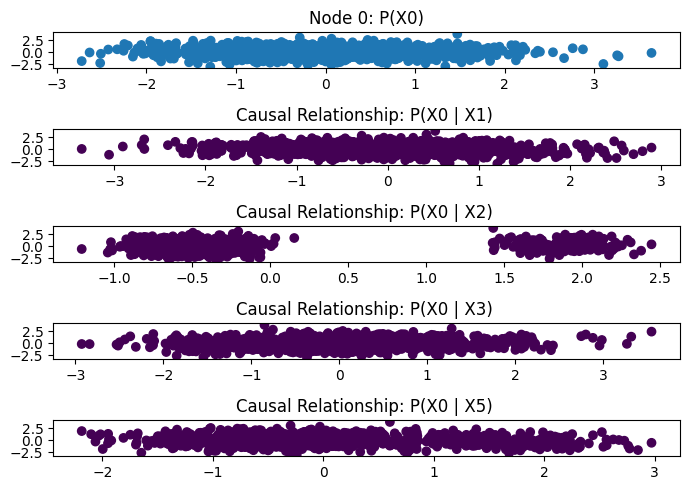

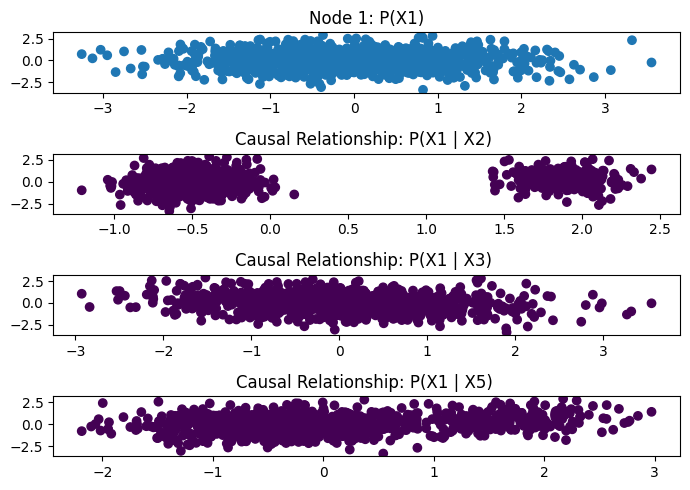

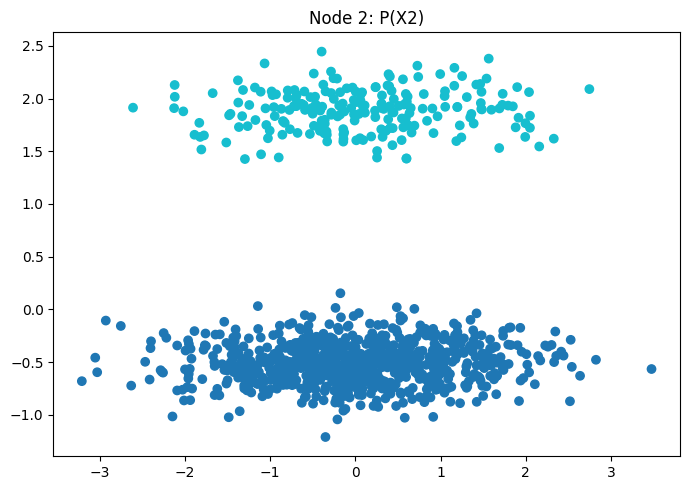

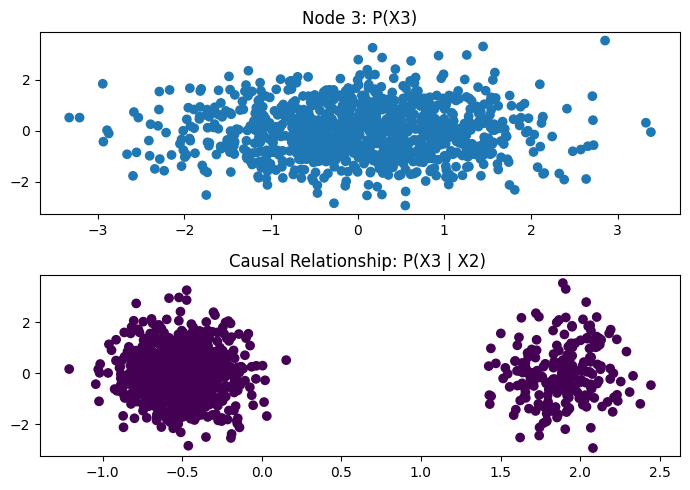

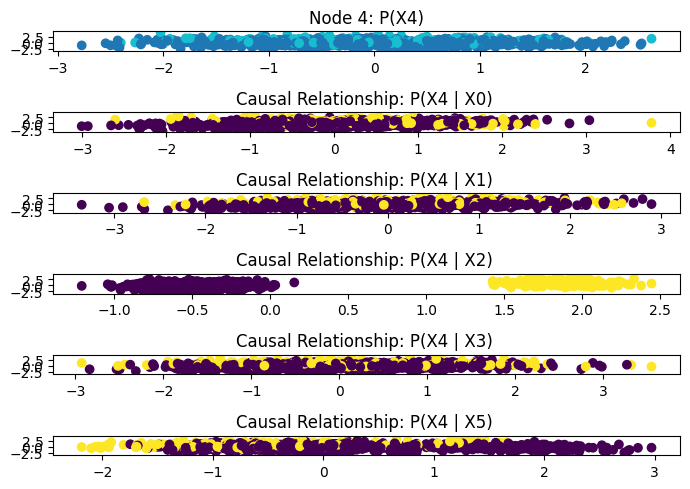

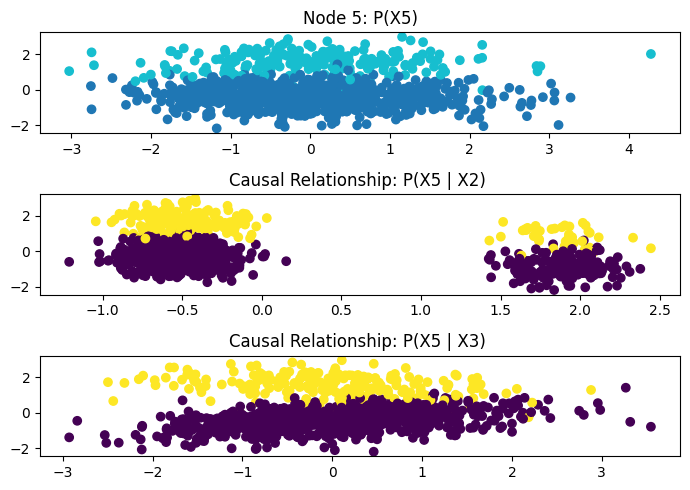

In [7]:
truths["_dg"].plot_X(mixed_X)

In [8]:
method_name = CD.CausalMixtures
method = method_name.get_method()
method.fit(mixed_X)
print(f"Graph eval ({method_name}): {method.get_graph_metrics(true_g)}")


print(f"Mixed Node sets: Topo {method.e_n_Z}" )
print(f"Graph eval (topo): {method.get_graph_metrics(true_g)}")

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: C:\Program Files\R\R-4.3.3
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save


DataMode.MIXED
Graph eval (causal-mixtures): {'sc': 0.026666666666666665, 'shd': 0.6666666666666666, 'sd': 0.26666666666666666, 'anc-aid': 0.4, 'parent-aid': 0.4666666666666667, 'sym-sd': 0.13333333333333333, 'sym-anc-aid': 0.30000000000000004, 'sym-pa-aid': 0.33333333333333337, 'shd-nm': 0.002962962962962963, 'f1': 0.6666666666666666, 'tp': 4, 'fp': 1, 'fn': 3, 'tn': 28, 'tpr': 0.5714285714285714, 'fpr': 0.034482758620689655, 'pr': 0.1388888888888889, 'tnr': 0.9655172413793104, 'fnr': 0.4285714285714286, 'mcc': np.float64(0.6144869015956641)}
Mixed Node sets: Topo [{1}, {2}, {5}]
Graph eval (topo): {'sc': 0.026666666666666665, 'shd': 0.6666666666666666, 'sd': 0.26666666666666666, 'anc-aid': 0.4, 'parent-aid': 0.4666666666666667, 'sym-sd': 0.13333333333333333, 'sym-anc-aid': 0.30000000000000004, 'sym-pa-aid': 0.33333333333333337, 'shd-nm': 0.002962962962962963, 'f1': 0.6666666666666666, 'tp': 4, 'fp': 1, 'fn': 3, 'tn': 28, 'tpr': 0.5714285714285714, 'fpr': 0.034482758620689655, 'pr': 0